Directory:
C:\Users\adarcher\Downloads\rastermap-master\rastermap-master\rastermap
File shape:
(824, 67502)
time; iteration;  explained PC variance
0.00s     0        0.0070
0.01s    10        0.0355
0.02s    20        0.0422
0.03s    30        0.0557
0.05s    40        0.0478
0.06s    50        0.0477
0.06s   final      0.0476
0.06s upsampled    0.0499
time; iteration;  explained PC variance
0.00s     0        0.0070
0.01s    10        0.0355
0.02s    20        0.0422
0.03s    30        0.0557
0.04s    40        0.0478
0.04s    50        0.0477
0.05s   final      0.0476
0.05s upsampled    0.0499


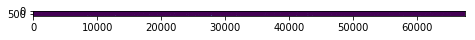

In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
path = 'C:/Users/adarcher/Downloads/rastermap-master/rastermap-master/rastermap'
os.chdir(path)
print('Directory:')
print(os.getcwd())
from mapping import Rastermap
from rastermap import Rastermap

model = Rastermap(n_components=1, n_X=30, nPC=200, init='pca')

sp = np.load('C:/Users/adarcher/Desktop/suite2p/plane0/spks.npy')
print('File shape:')
print(sp.shape)
model.fit(sp)

ax = plt.axes([1, 1, 1, 1])
ax.imshow(sp[model.isort1, :], interpolation='none')
#plt.imshow(sp[model.isort1, :])

# fit_transform returns embedding (upsampled cluster identities)
embedding = model.fit_transform(sp)

# embedding : array-like, shape (n_samples, n_components) Stores the embedding vectors.
# u,sv,v : singular value decomposition of data S, potentially with smoothing
# isort1 : sorting along first dimension (n_samples) of matrix
# isort2 : sorting along second dimension (n_features) of matrix (if n_Y > 0)
# cmap : correlation of each item with all locations in the embedding map (before upsampling)
# A : PC coefficients of each Fourier mode

In [41]:
### sort neurons and smooth across neurons and zscore in time
from scipy.stats import zscore
from scipy.ndimage import gaussian_filter1d
from matplotlib import cm
from scipy.stats import zscore

isort = np.argsort(model.embedding[:,0])
Sm = gaussian_filter1d(sp[isort,:].T, np.minimum(3,int(sp.shape[0]*0.005)), axis=1)
Sm = Sm.T

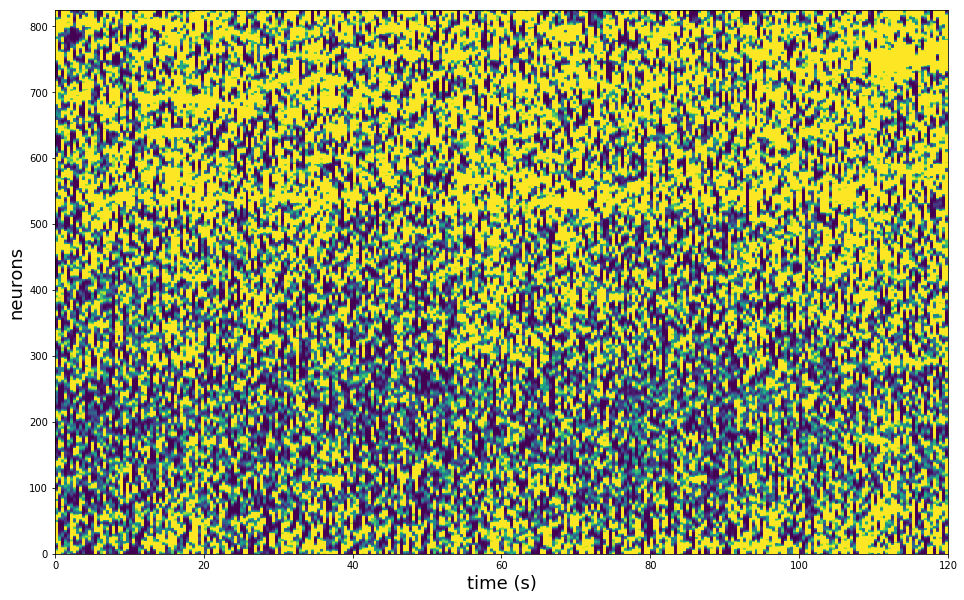

In [42]:
### from MouseLand, run_rastermap.ipynb
### view neuron sorting
fs = 2.5 # sampling rate of data in Hz
splot = Sm[::-1,1500:1800]
plt.figure(figsize=(16,10))
ax=plt.imshow(splot, vmin=0,vmax=1.5,aspect='auto',extent=[0,splot.shape[1]/fs, 0,splot.shape[0]])
plt.xlabel('time (s)', fontsize=18)
plt.ylabel('neurons', fontsize=18)
plt.show()